In [1]:
using Plots

In [2]:
using Distributions, NLsolve

In [3]:
pyplot()

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


Plots.PyPlotBackend()

In [5]:
using IntervalRootFinding, IntervalArithmetic

In [6]:
using Roots

In [7]:
dene = Exponential()

Exponential{Float64}(θ=1.0)

In [74]:
c = 5
T = 0.5
beta = 1/T;

In [75]:
valores = Float64[]
pesos= Float64[];


In [76]:
ens = Int64(10^5)

100000

In [77]:
for i in 1:ens
ej = rand(dene)
ek = rand(dene, c)
wkj = 1.0./(1 .+ exp.(-beta.*(ek .- ej)))
wjk = 1.0./(1 .+ exp.(-beta.*(ej .- ek)))
yk = rand(0:1:c-1, c)
f(lambda) = lambda .+ 1/c*sum(wkj.*(1 .- wjk./(wjk .+ lambda.*c .+ yk)))
jacob(lambda) = 1 + 1/c*sum(wkj) + sum(wkj.*wjk./(wjk .+ lambda*c .+ yk).^2)
vals =  find_zeros(f, -1.,0.)
weights = 1.0./[jacob(k) for k in vals]  
push!(valores, vals...)
push!(pesos, weights...)
end

InterruptException: InterruptException:

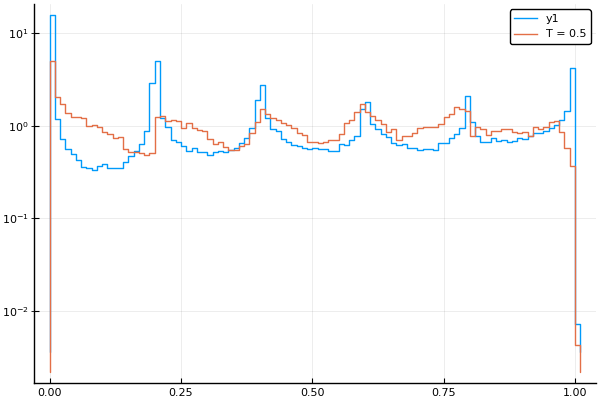

In [79]:
stephist!(-valores, weightss = pesos,   bins = 100, normed = true, yscale = :log10, label = "T = 0.5")

In [24]:
jacob(lambda) = 1 + 1/c*sum(wkj) + sum(wkj.*wjk./(wjk .+ lambda*c .+ yk).^2)

jacob (generic function with 1 method)

In [29]:
1.0./[jacob(k) for k in vals]   

3-element Array{Float64,1}:
 0.04255605368525687
 0.0                
 0.94968673210027   

In [20]:
lambda = -1.:0.01:0.
fs = [f(x) for x in lambda] ;

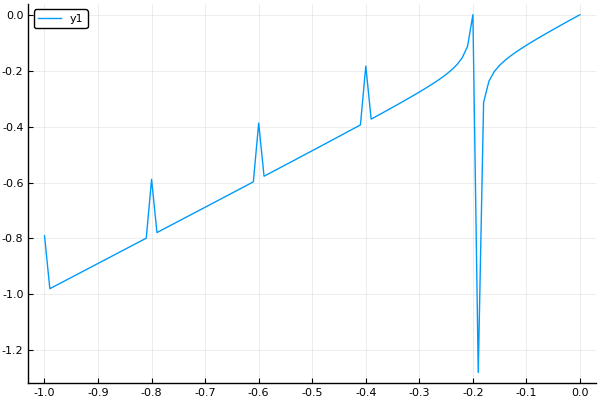

In [21]:
plot(lambda, fs, xaxis = -1.:0.1:0.)

In [156]:
b =  find_zeros(f, -1.,0.)
d = [f(a) for a in b]
k = b[-Inf .< d .< Inf]

3-element Array{Float64,1}:
 -0.9364873612858299
 -0.7931615223499845
 -0.2687463052308288

In [157]:
[f(a) for a in k]

3-element Array{Float64,1}:
 2.220446049250313e-16 
 1.1102230246251565e-16
 1.3877787807814457e-15

In [133]:
d = roots(f, -1..0)

MethodError: MethodError: no method matching Float64(::Interval{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:185
  Float64(::T<:Number) where T<:Number at boot.jl:725
  Float64(!Matched::Int8) at float.jl:60
  ...

9-element Array{Float64,1}:
 -0.7621417465091975 
 -0.7157112502671885 
 -0.5938634288167431 
 -0.5264292054190715 
 -0.45154811634708275
 -0.3676785225032114 
 -0.3502986478276961 
 -0.3131781279898694 
 -0.2421445092094585 

In [42]:
b.zero

1-element Array{Float64,1}:
 -0.5035477791357713

In [ ]:
fprima(lambda) = 1 + 1/c